### TABLE OF CONTENTS
01 - Import Libraries
02 - Import Data
03 - Check Data
04 - Data Analysis
The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

The sales team needs to know whether there are particular times of the day when people spend the most money?

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:
What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
Are there differences in ordering habits based on a customer’s loyalty status?
Are there differences in ordering habits based on a customer’s region?
Is there a connection between age and family status in terms of ordering habits?
What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


### 01 Import Libraries

In [1]:
# import Libraries
import pandas as pd
import pandas_profiling
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import chardet
import fuzzywuzzy

### 02 Import Data

In [2]:
df=pd.read_pickle(r"C:\Users\drmat\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\final_merged4-10.pkl")

### 03 Check Data

In [10]:
pd.options.display.max_columns = None

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641279 entries, 0 to 32641278
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_day_of_week       float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                float64
 11  department_id           float64
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest days            object 
 15  busiest_period_of_day   object 
 16  max_order               float64
 17  loyalty_flag            object 
 18  average_price           float64
 19  spending_flag           object 
 20  median_days             float64
 21  order_frequency_flag    objec

In [11]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department,region,activity_level,age_groups,income_range,parents,age_dep_profile
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,77.0,7.0,9.0,mid range product,regular day,average orders,11.0,regular customer,6.367797,low spender,20.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,beverages,South,High-Activity,under 40,under 100k,Parent,Young Parent
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,mid range product,least busy day,average orders,11.0,regular customer,6.367797,low spender,20.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,beverages,South,High-Activity,under 40,under 100k,Parent,Young Parent
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,mid range product,least busy day,most orders,11.0,regular customer,6.367797,low spender,20.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,beverages,South,High-Activity,under 40,under 100k,Parent,Young Parent
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,mid range product,least busy day,average orders,11.0,regular customer,6.367797,low spender,20.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,beverages,South,High-Activity,under 40,under 100k,Parent,Young Parent
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,mid range product,least busy day,most orders,11.0,regular customer,6.367797,low spender,20.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,beverages,South,High-Activity,under 40,under 100k,Parent,Young Parent


In [12]:
df.tail()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department,region,activity_level,age_groups,income_range,parents,age_dep_profile
32641274,101324.0,205811.0,12.0,0.0,22.0,25.0,42091.0,6.0,0.0,Pesto Sauce,68.0,10.0,5.7,mid range product,busiest day,average orders,20.0,regular customer,7.438138,low spender,21.0,Non-frequent customer,Male,New Mexico,80.0,10/3/2019,0.0,divorced/widowed,169212.0,bulk,West,High-Activity,over 60,100-300k,Not Parent,Older Non Parent
32641275,1968235.0,205961.0,1.0,0.0,15.0,NaN,42091.0,13.0,0.0,Pesto Sauce,68.0,10.0,5.7,mid range product,busiest day,most orders,7.0,new customer,7.291358,low spender,30.0,Non-frequent customer,Female,Nevada,44.0,9/10/2019,3.0,married,112634.0,bulk,West,High-Activity,40-60,100-300k,Parent,Mid Age Parent
32641276,2340086.0,205961.0,4.0,3.0,10.0,22.0,42091.0,8.0,1.0,Pesto Sauce,68.0,10.0,5.7,mid range product,least busy day,most orders,7.0,new customer,7.291358,low spender,30.0,Non-frequent customer,Female,Nevada,44.0,9/10/2019,3.0,married,112634.0,bulk,West,High-Activity,40-60,100-300k,Parent,Mid Age Parent
32641277,3305261.0,205999.0,15.0,4.0,15.0,17.0,5161.0,29.0,0.0,Dried Mango,18.0,10.0,6.1,mid range product,least busy day,most orders,22.0,regular customer,6.741290,low spender,14.0,Regular customer,Female,Florida,23.0,3/25/2018,0.0,single,40688.0,bulk,South,High-Activity,under 40,under 100k,Not Parent,Young Non Parent
32641278,452362.0,206011.0,14.0,4.0,14.0,1.0,22827.0,5.0,0.0,Organic Black Mission Figs,18.0,10.0,5.1,mid range product,least busy day,most orders,16.0,regular customer,7.480769,low spender,27.0,Non-frequent customer,Female,Nebraska,81.0,2/11/2018,3.0,married,145938.0,bulk,Midwest,High-Activity,over 60,100-300k,Parent,Older Parent


In [13]:
df['product_name'].value_counts()

Banana                                                                                                                472565
Bag of Organic Bananas                                                                                                379450
Organic Strawberries                                                                                                  264683
Organic Baby Spinach                                                                                                  241921
Organic Hass Avocado                                                                                                  213584
                                                                                                                       ...  
Super Nutrition Vanilla Shake                                                                                              1
Smooth & Silky Head and Shoulders Smooth & Silky 2-in-1 Dandruff Shampoo + Conditioner 13.5 Fl Oz Female Hair Care         1


### 04 Data Analysis

#### What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

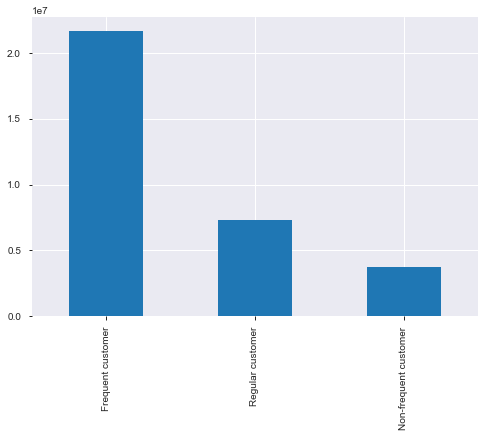

In [7]:
bar_frequency_flag = df['order_frequency_flag'].value_counts().plot.bar()

#### Are there differences in ordering habits based on a customer’s loyalty status?

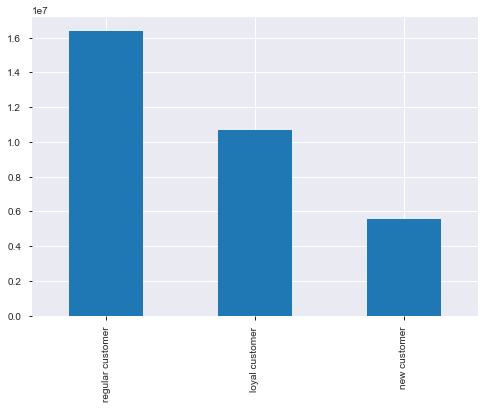

In [6]:
bar_loyalty_flag = df['loyalty_flag'].value_counts().plot.bar()

#### Are there differences in ordering habits based on a customer’s region?

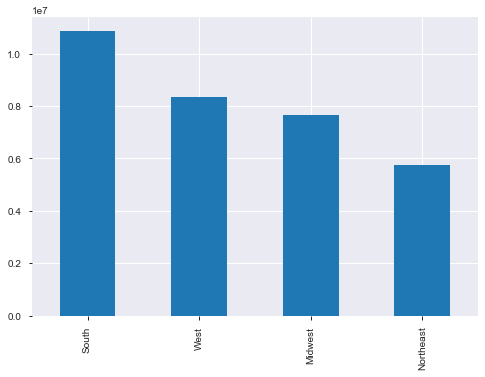

In [8]:
bar_region_order = df['region'].value_counts().plot.bar()

#### Is there a connection between age and family status in terms of ordering habits?

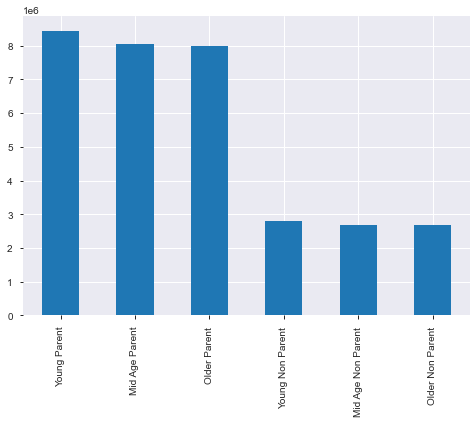

In [9]:
bar_age_dep_profile = df['age_dep_profile'].value_counts().plot.bar()

#### What different classifications does the demographic information suggest? Age

In [114]:
crosstab_age_prior_order = pd.crosstab(df['age_groups'], df['order_frequency_flag'])  

In [115]:
crosstab_age_prior_order

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_groups,,,
40-60,7103985,1232207,2399750
over 60,7086494,1209444,2364134
under 40,7448709,1272960,2523585


<AxesSubplot:xlabel='age_groups'>

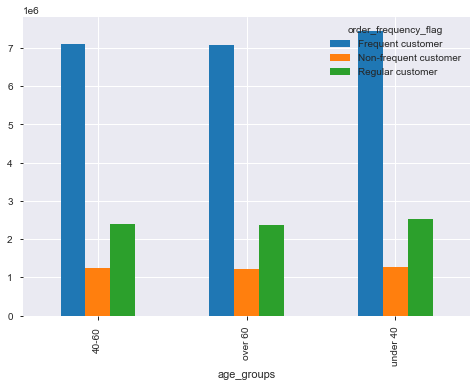

In [116]:
crosstab_age_prior_order.plot.bar()

In [117]:
crosstab_age_prices = pd.crosstab(df['age_groups'], df['spending_flag'])
crosstab_age_prices   

spending_flag,high spender,low spender
age_groups,,
40-60,216424,10519518
over 60,210465,10449607
under 40,213146,11032108


<AxesSubplot:xlabel='age_groups'>

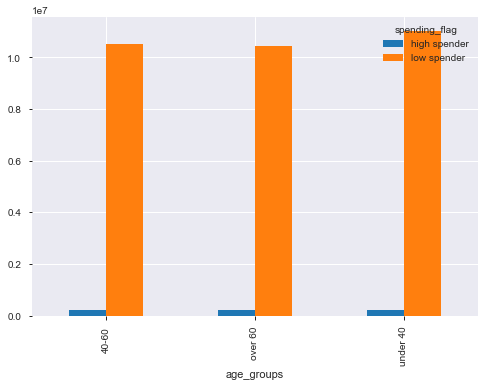

In [118]:
crosstab_age_prices.plot.bar()

In [46]:
crosstab_age_reordered = pd.crosstab(df['age_groups'], df['reordered'])
crosstab_age_reordered

reordered,0.0,1.0
age_groups,,
40-60,4383317,6284760
over 60,4348756,6243738
under 40,4576177,6598311


<AxesSubplot:xlabel='age_groups'>

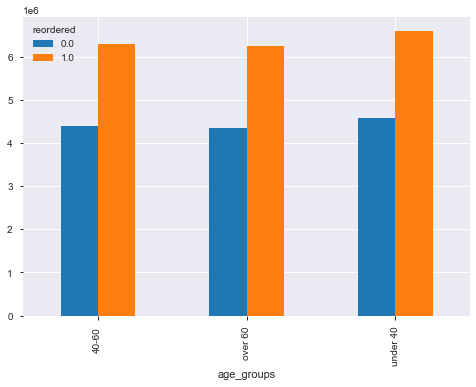

In [70]:
crosstab_age_reordered.plot.bar()

#### What different classifications does the demographic information suggest?  Income? 

In [119]:
crosstab_income_prior_order = pd.crosstab(df['income_range'], df['order_frequency_flag'])
crosstab_income_prior_order   

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_range,,,
100-300k,9890819,1625733,3296395
over 300k,72818,7634,21604
under 100k,11675551,2081244,3969470


<AxesSubplot:xlabel='income_range'>

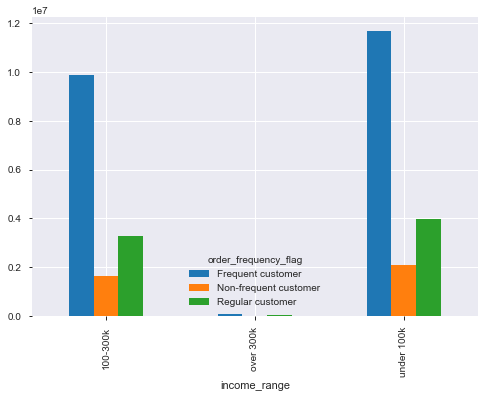

In [120]:
crosstab_income_prior_order.sort_index().plot.bar()

In [121]:
crosstab_income_prices = pd.crosstab(df['income_range'], df['spending_flag'])
crosstab_income_prices    

spending_flag,high spender,low spender
income_range,,
100-300k,444722,14368225
over 300k,102056,0
under 100k,93257,17633008


<AxesSubplot:xlabel='income_range'>

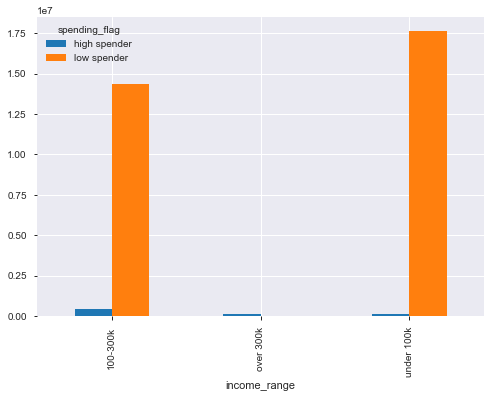

In [122]:
crosstab_income_prices.plot.bar()

In [50]:
crosstab_income_reordered = pd.crosstab(df['income_range'], df['reordered'])
crosstab_income_reordered

reordered,0.0,1.0
income_range,,
100-300k,6099428,8626643
over 300k,42517,59157
under 100k,7166305,10441009


<AxesSubplot:xlabel='income_range'>

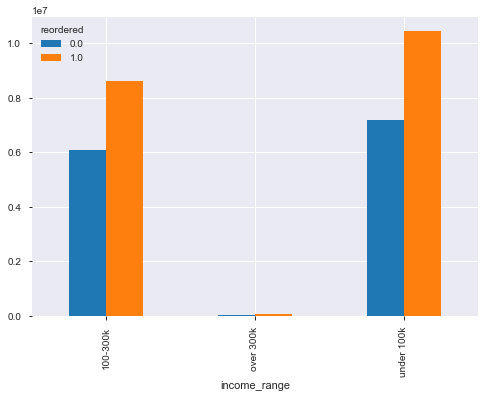

In [86]:
crosstab_income_reordered.plot.bar()

#### What different classifications does the demographic information suggest?  Certain types of goods?

In [125]:
crosstab_department_prior_order = pd.crosstab(df['department'], df['order_frequency_flag'])
crosstab_department_prior_order    

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,102905,17953,32838
babies,319451,32044,72307
bakery,781888,130089,260451
beverages,1782602,305293,600228
breakfast,463165,80874,158994
bulk,25333,3083,6157
canned goods,671345,138093,258620
dairy eggs,3672996,568698,1157053
deli,684951,123319,242979


<AxesSubplot:xlabel='department'>

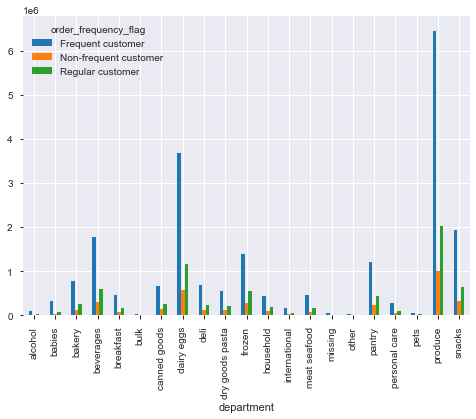

In [126]:
crosstab_department_prior_order.plot.bar()

In [100]:
crosstab_department_prices = pd.crosstab(df['department'], df['spending_flag'])
crosstab_department_prices

spending_flag,high spender,low spender
department,,
alcohol,13247,140449
babies,4693,419109
bakery,29557,1142871
beverages,61261,2626862
breakfast,15702,687331
bulk,123,34450
canned goods,21423,1046635
dairy eggs,114248,5284499
deli,17652,1033597


<AxesSubplot:xlabel='department'>

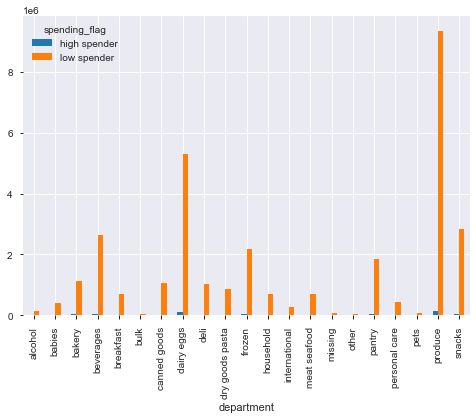

In [102]:
crosstab_department_prices.plot.bar()

In [55]:
crosstab_department_reordered = pd.crosstab(df['department'], df['reordered'])
crosstab_department_reordered

reordered,0.0,1.0
department,,
alcohol,66101,87595
babies,178433,245369
bakery,436273,736155
beverages,931539,1756584
breakfast,308948,394085
bulk,14623,19950
canned goods,579523,488535
dairy eggs,1783262,3615485
deli,412385,638864


<AxesSubplot:xlabel='department'>

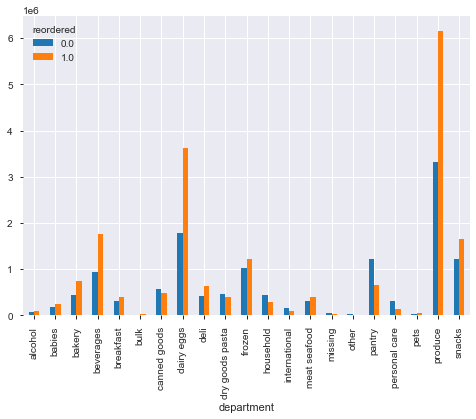

In [103]:
crosstab_department_reordered.plot.bar()

#### What different classifications does the demographic information suggest?  Family status?

In [104]:
crosstab_fam_status_prior_order = pd.crosstab(df['fam_status'], df['order_frequency_flag'])
crosstab_fam_status_prior_order

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
fam_status,,,
divorced/widowed,1857491,314452,620157
living with parents and siblings,1051057,178690,332169
married,15194409,2618022,5109974
single,3536231,603447,1225169


<AxesSubplot:xlabel='fam_status'>

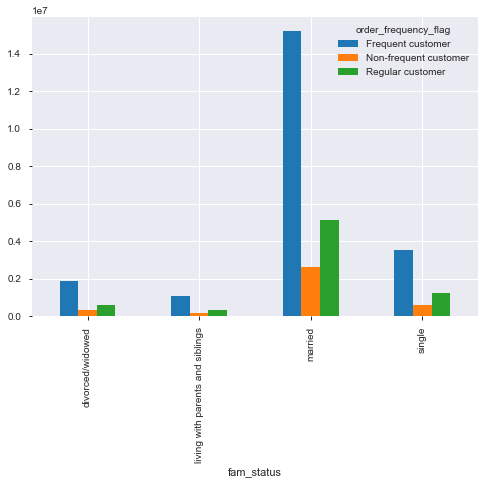

In [105]:
crosstab_fam_status_prior_order.plot.bar()

In [106]:
crosstab_parents_prior_order = pd.crosstab(df['parents'], df['order_frequency_flag'])
crosstab_parents_prior_order

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parents,,,
Not Parent,5393722,917899,1845326
Parent,16245466,2796712,5442143


<AxesSubplot:xlabel='parents'>

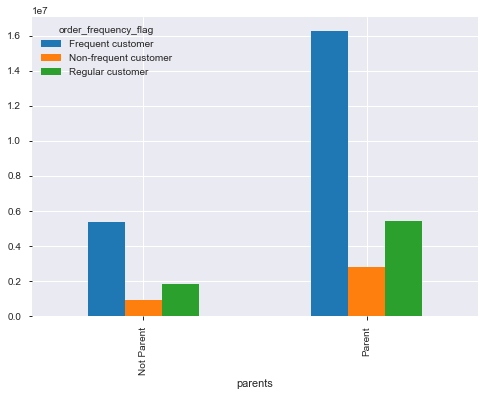

In [107]:
crosstab_parents_prior_order.plot.bar()

In [108]:
crosstab_fam_status_prices = pd.crosstab(df['fam_status'], df['spending_flag'])
crosstab_fam_status_prices

spending_flag,high spender,low spender
fam_status,,
divorced/widowed,53193,2738907
living with parents and siblings,29658,1532258
married,455373,22467032
single,101811,5263036


<AxesSubplot:xlabel='fam_status'>

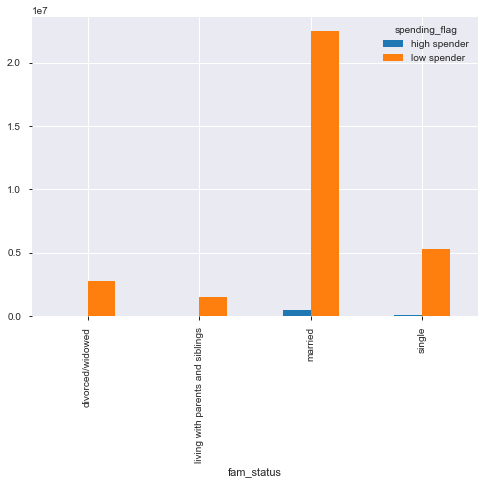

In [109]:
crosstab_fam_status_prices.plot.bar()

In [110]:
crosstab_parents_prices = pd.crosstab(df['parents'], df['spending_flag'])
crosstab_parents_prices

spending_flag,high spender,low spender
parents,,
Not Parent,155004,8001943
Parent,485031,23999290


<AxesSubplot:xlabel='parents'>

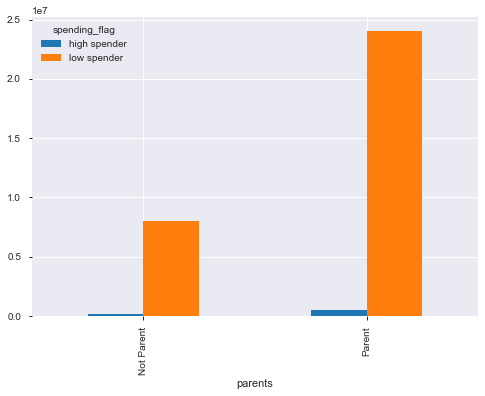

In [111]:
crosstab_parents_prices.plot.bar()

In [112]:
crosstab_fam_status_reordered = pd.crosstab(df['fam_status'], df['reordered'])
crosstab_fam_status_reordered

reordered,0.0,1.0
fam_status,,
divorced/widowed,1136692,1637768
living with parents and siblings,634695,917520
married,9355078,13422421
single,2181785,3149100


<AxesSubplot:xlabel='fam_status'>

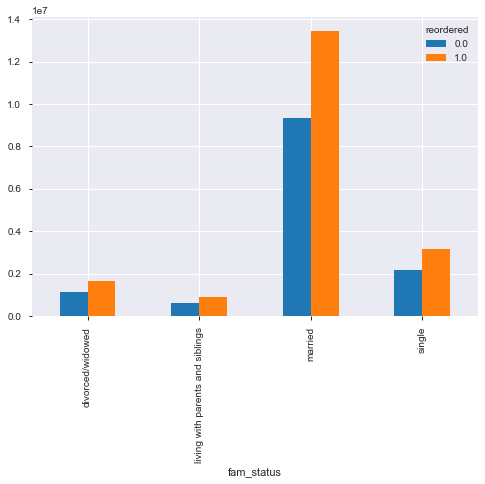

In [113]:
crosstab_fam_status_reordered.plot.bar()

In [129]:
crosstab_parents_reorder = pd.crosstab(df['parents'], df['reordered'])
crosstab_parents_reorder

reordered,0.0,1.0
parents,,
Not Parent,3318477,4786868
Parent,9989773,14339941


<AxesSubplot:xlabel='parents'>

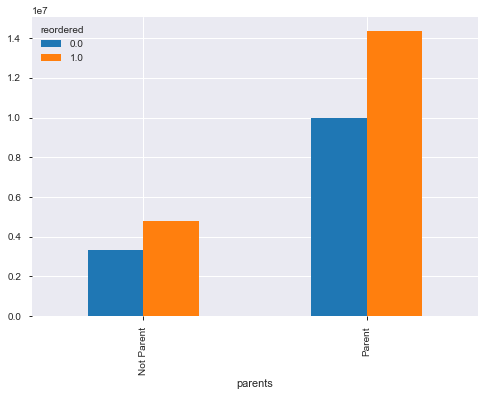

In [130]:
crosstab_parents_reorder.plot.bar()

<AxesSubplot:ylabel='Frequency'>

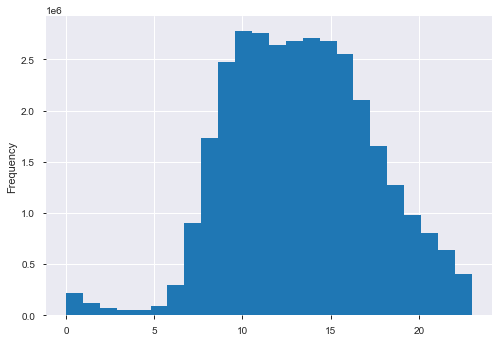

In [128]:
df['order_hour_of_day'].plot.hist(bins=24)